In [57]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# Renaming Columns
df=pd.read_csv('C:\\Users\\User\\Downloads\\Glass Identification.csv',header=None,names=['Id','RI','Sodium','Magnesium',
                                                                                         'Aluminum','Silicon','Potassium',
                                                                                         'Calcium','Barium','Iron','Type of glass'])
df.head()

,Id,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

In [66]:
df['Class']=df['Type of glass'].map({1:'W',2:'W',3:'W',4:'W',5:'NW',6:'NW',7:'NW'})
df.head()

,Id,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,W
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,W
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,W
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,W
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,W


In [43]:
df.isna().sum()

Id               0
RI               0
Sodium           0
Magnesium        0
Aluminum         0
Silicon          0
Potassium        0
Calcium          0
Barium           0
Iron             0
Type of glass    0
Class            0
dtype: int64

No Null data is present

# Exploratory Data Analysis

Text(0.5, 1.0, 'Magnesium vs Type of glass')

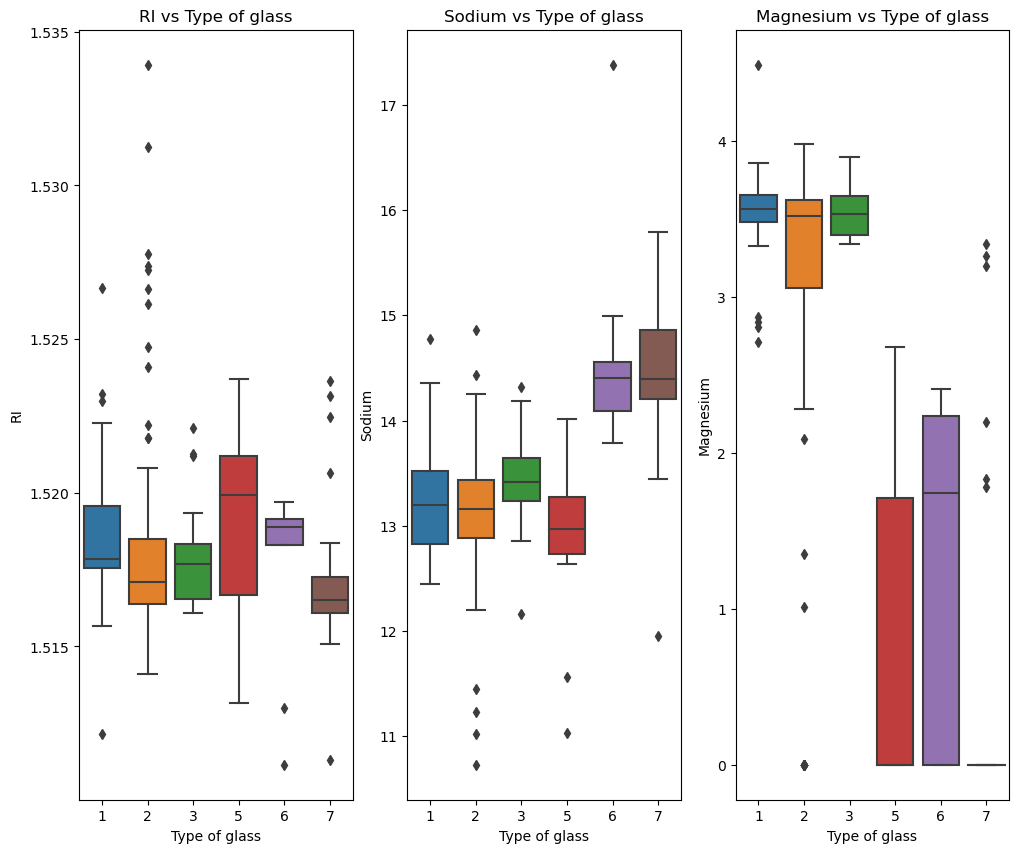

In [44]:
f,ax=plt.subplots(1,3,figsize=(12, 10),sharex=True)
sns.boxplot(df,x='Type of glass',y='RI',ax=ax[0])
ax[0].set_title('RI vs Type of glass')
sns.boxplot(df,x='Type of glass',y='Sodium',ax=ax[1])
ax[1].set_title('Sodium vs Type of glass')
sns.boxplot(df,x='Type of glass',y='Magnesium',ax=ax[2])
ax[2].set_title('Magnesium vs Type of glass')

Text(0.5, 1.0, 'Aluminum vs Type of glass')

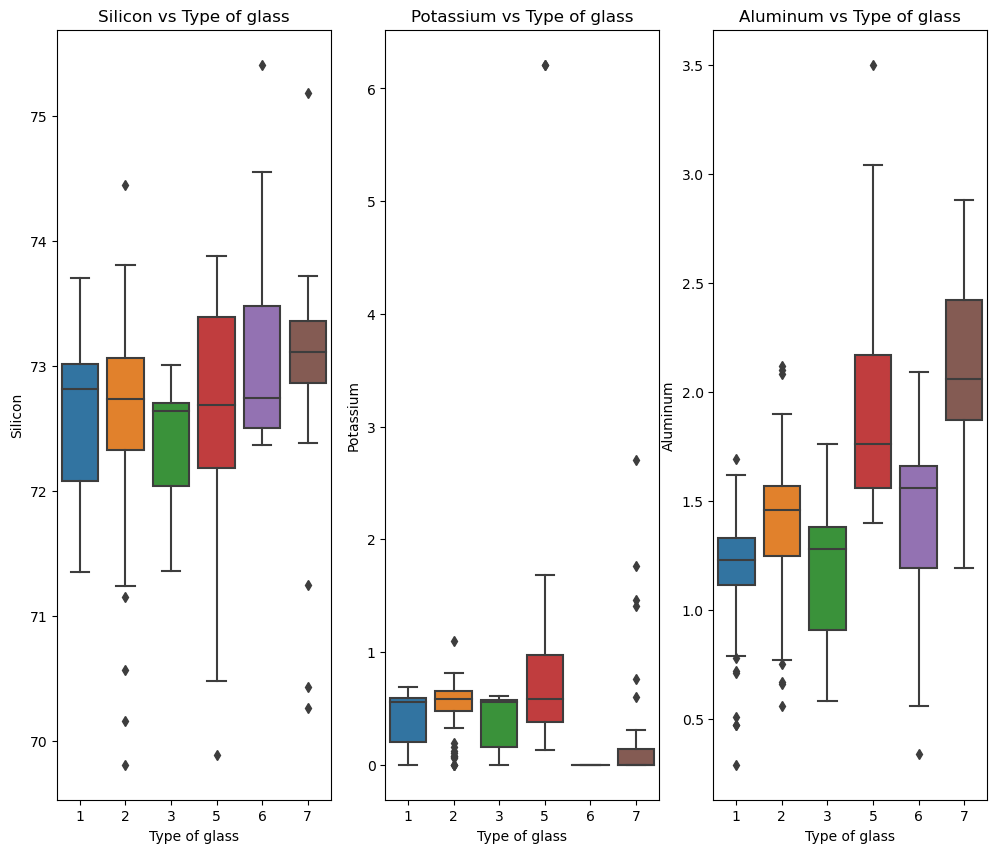

In [45]:
f,ax=plt.subplots(1,3,figsize=(12, 10),sharex=True)
sns.boxplot(df,x='Type of glass',y='Silicon',ax=ax[0])
ax[0].set_title('Silicon vs Type of glass')
sns.boxplot(df,x='Type of glass',y='Potassium',ax=ax[1])
ax[1].set_title('Potassium vs Type of glass')
sns.boxplot(df,x='Type of glass',y='Aluminum',ax=ax[2])
ax[2].set_title('Aluminum vs Type of glass')

Text(0.5, 1.0, 'Iron vs Type of glass')

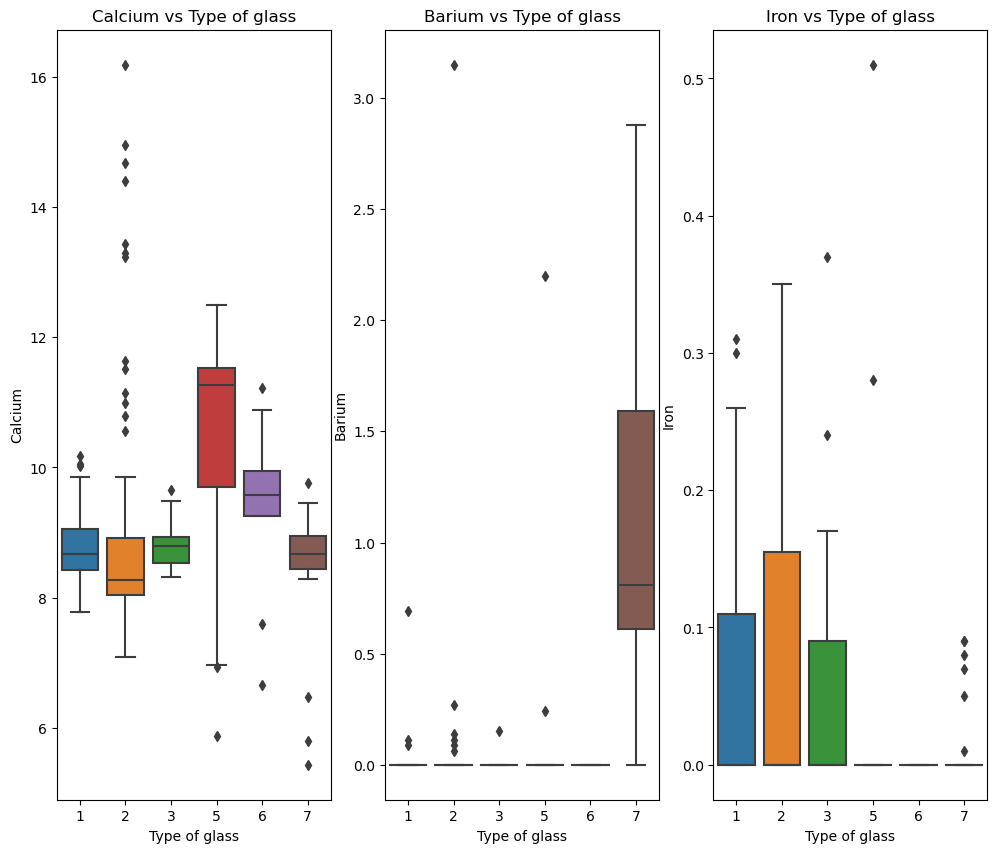

In [46]:
f,ax=plt.subplots(1,3,figsize=(12, 10),sharex=True)
sns.boxplot(df,x='Type of glass',y='Calcium',ax=ax[0])
ax[0].set_title('Calcium vs Type of glass')
sns.boxplot(df,x='Type of glass',y='Barium',ax=ax[1])
ax[1].set_title('Barium vs Type of glass')
sns.boxplot(df,x='Type of glass',y='Iron',ax=ax[2])
ax[2].set_title('Iron vs Type of glass')

# Inference:

1) RI: Both W and NW type glass has same Median RI with W glass having some outliers.

2)Sodium: W type glass has less sodium compared to NW glass

3)Magnesium: W type glass has higher Magnesium compared to NW glass.

4)Silicon: Both are the same 

5)Potassium: NW has almost 0 and W close to 0.5

6)Aluminium:NW has higher concentrations of Aluminium compared to W 

7)Calcium:Both are approximately same with W having some higher values.

8)Barium: W has some higher outlier otherwise nil and NW has 0.5.

9)Iron:W has 0.05 and NW is 0.

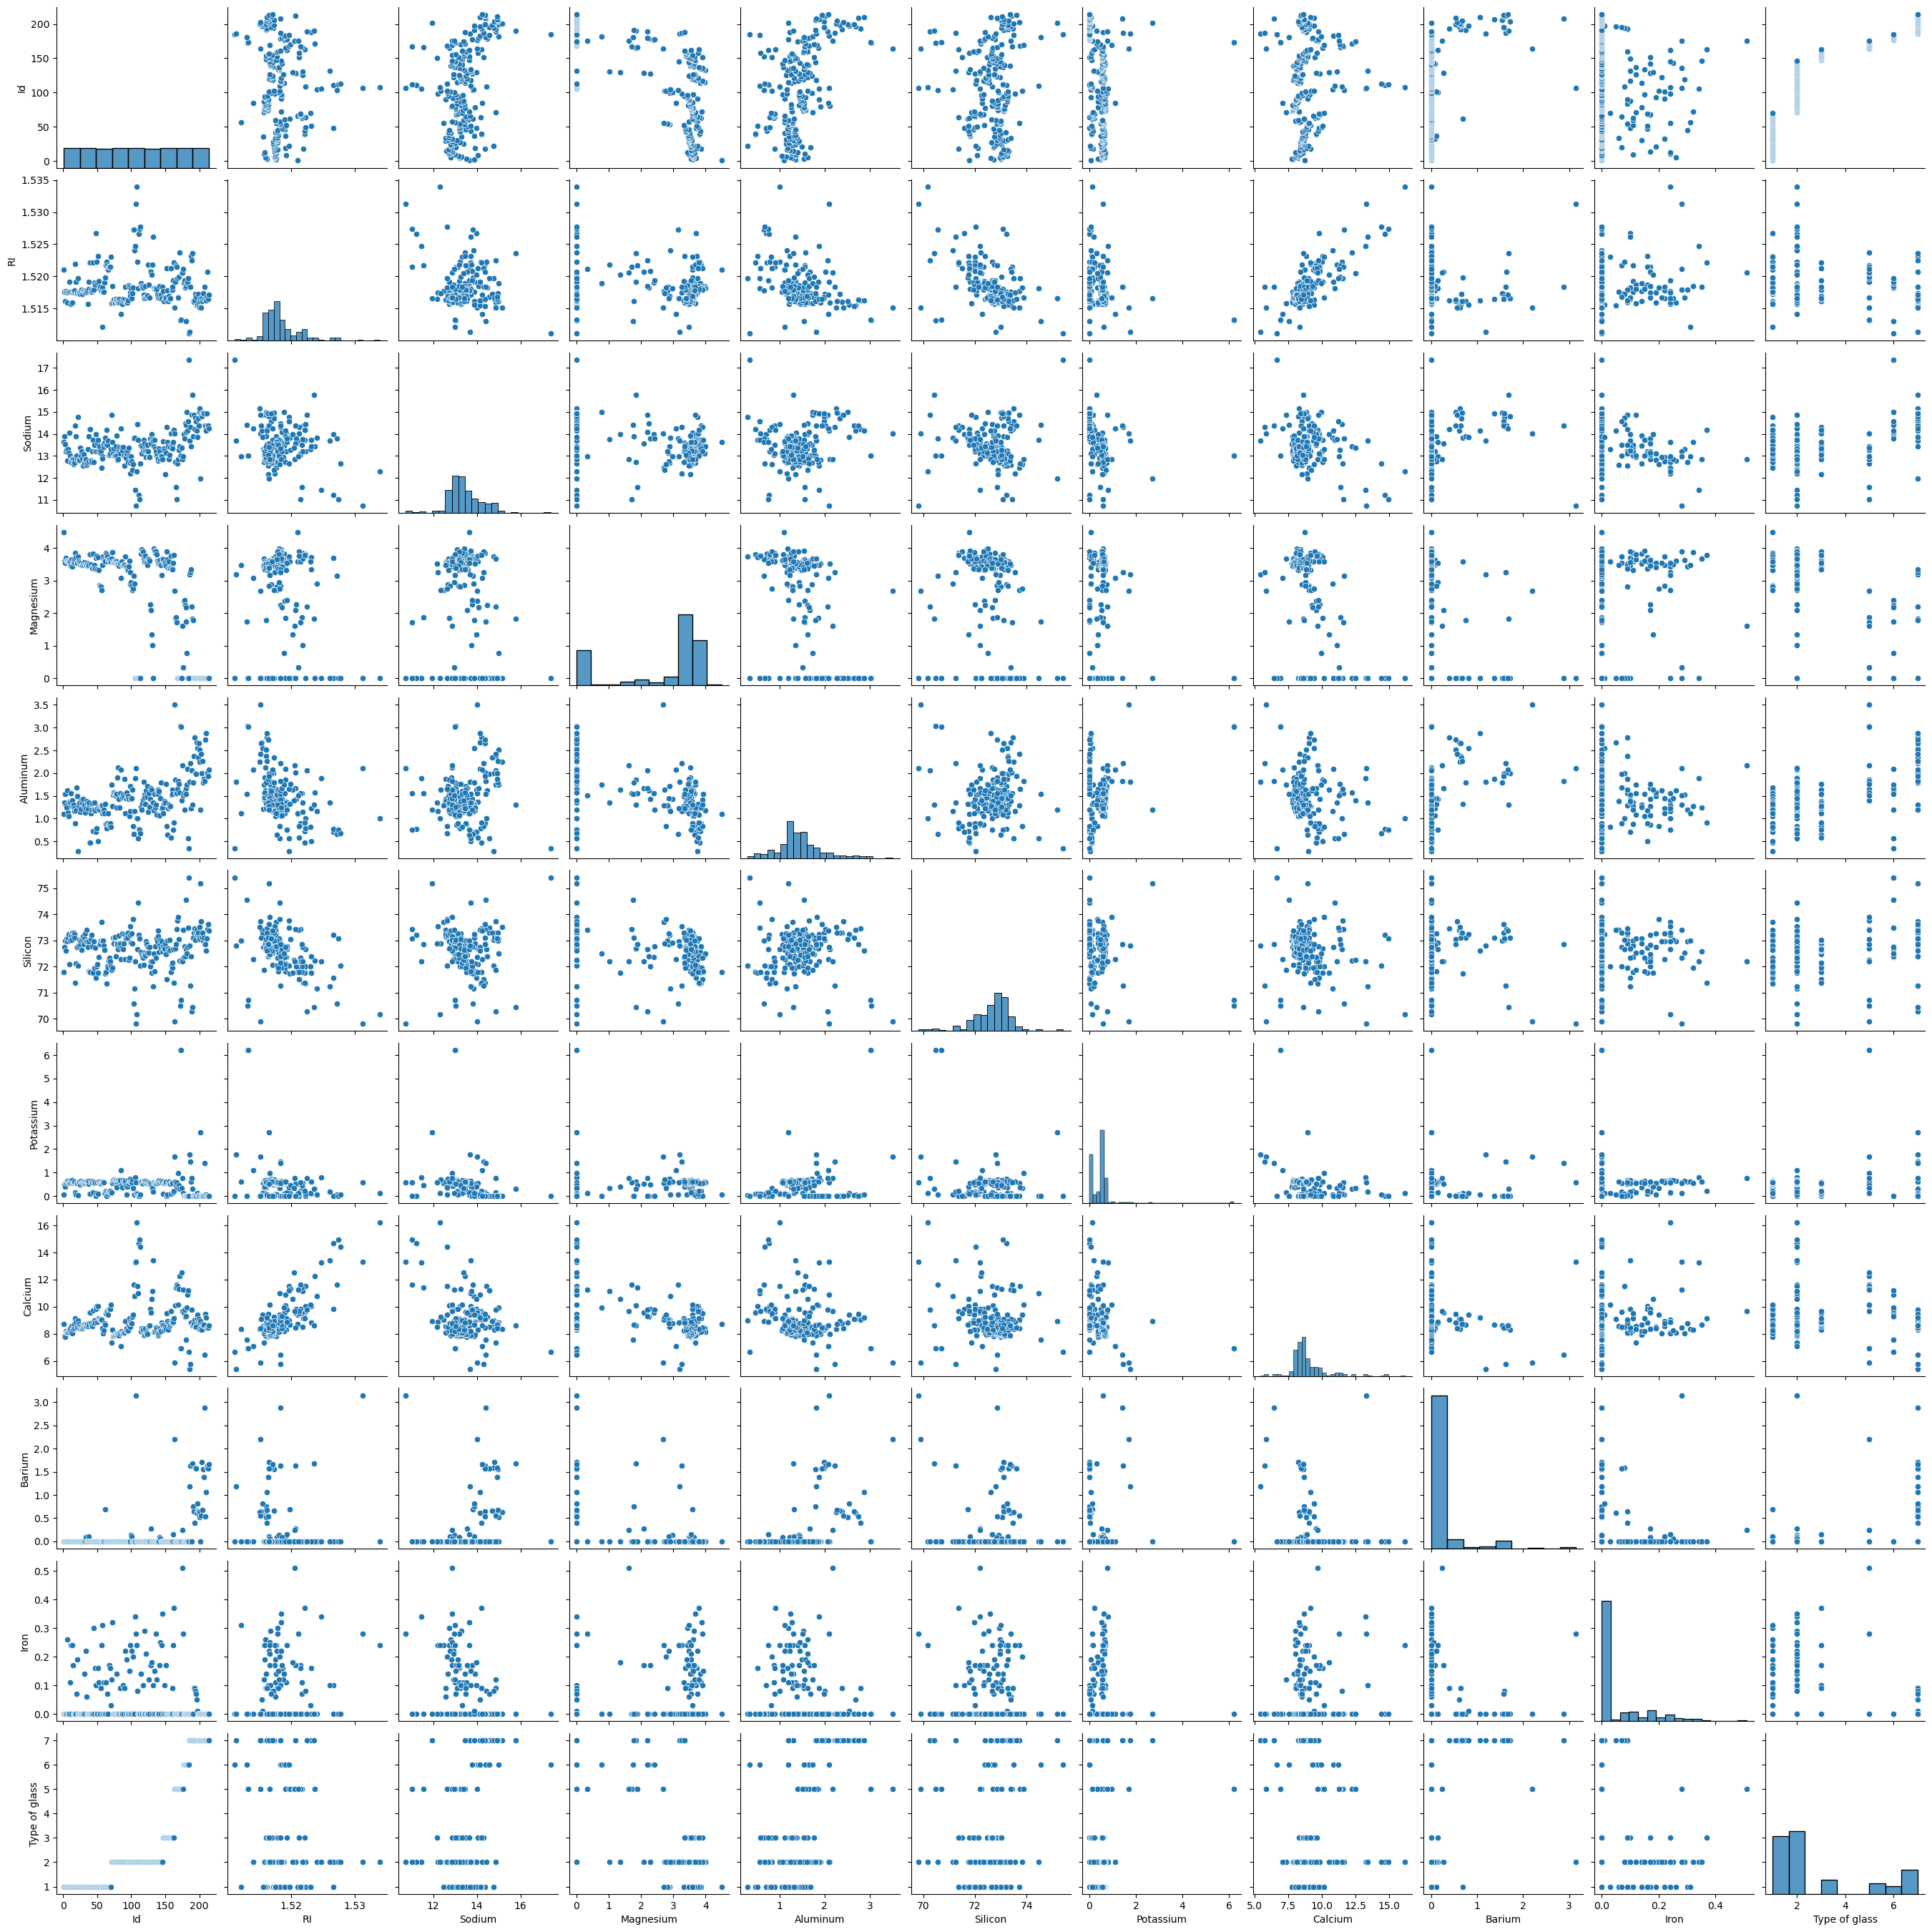

In [47]:
sns.pairplot(df)

C:\Users\User\AppData\Local\Temp\ipykernel_10524\4211287175.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,1:].corr(),annot=True)


<Axes: >

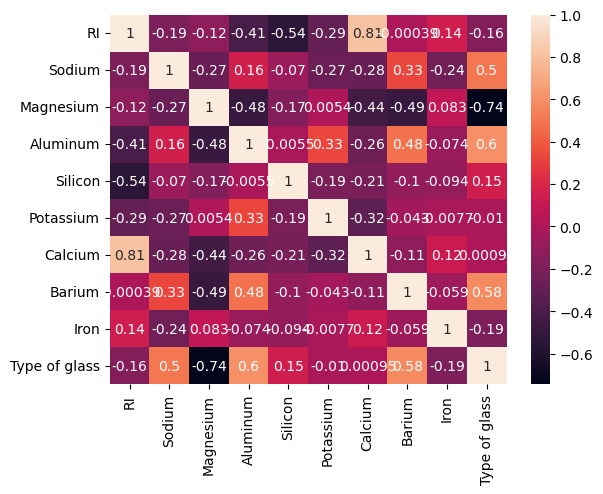

In [48]:
sns.heatmap(df.iloc[:,1:].corr(),annot=True)

RI and Calcium are strongly correlated.
Barium Aluminium ,Potassium Aluminium are moderatly correlated.
RI and silicon are weakly correlated

In [67]:
df.drop('Id',axis=1,inplace=True)

In [68]:
df=pd.get_dummies(data=df,columns=['RI', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium',
       'Calcium', 'Barium', 'Iron'])
df['Class']=preprocessing.LabelEncoder().fit_transform(df['Class'])
df.head()


,Type of glass,Class,RI_1.51115,RI_1.51131,RI_1.51215,RI_1.51299,RI_1.51316,RI_1.51321,RI_1.51409,RI_1.51508,...,Iron_0.26,Iron_0.28,Iron_0.29,Iron_0.3,Iron_0.31,Iron_0.32,Iron_0.34,Iron_0.35,Iron_0.37,Iron_0.51
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Train and Test split

In [92]:
# y=df['Type of glass']
# X=df.drop('Type of glass',axis=1)
# print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [93]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
X_train=pca.fit_transform(X_train)


In [94]:
pca.explained_variance_

array([0.42463571, 0.27343754, 0.1279889 , 0.1038091 , 0.09908111,
       0.09502833, 0.09421766, 0.09232753, 0.08756569, 0.08265755])

In [95]:
X_test = pca.transform(X_test)

In [96]:
# Example: Using Support Vector Machine (SVM) classifier
clf1 = SVC()
clf1.fit(X_train, y_train)

SVC()

In [97]:
accuracy = clf1.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have trained your model and obtained predictions
y_pred_svm = clf1.predict(X_test)

# Compare y_test and y_pred using accuracy score
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", class_report)

Accuracy: 0.6666666666666666
Confusion Matrix:
 [[ 1  8  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.11      0.20         9
           2       0.48      1.00      0.65        10
           3       0.00      0.00      0.00         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         6

    accuracy                           0.67        33
   macro avg       0.75      0.63      0.61        33
weighted avg       0.78      0.67      0.60        33



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
# Assuming you have trained your model and obtained predictions
y_pred_lr = clf2.predict(X_test)

# Compare y_test and y_pred using accuracy score
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", class_report)

Accuracy: 0.45454545454545453
Confusion Matrix:
 [[2 7 0 0 0 0]
 [4 6 0 0 0 0]
 [0 2 0 0 0 0]
 [0 1 0 0 0 2]
 [0 0 0 0 1 2]
 [0 0 0 0 0 6]]
Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.22      0.27         9
           2       0.38      0.60      0.46        10
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         3
           7       0.60      1.00      0.75         6

    accuracy                           0.45        33
   macro avg       0.38      0.36      0.33        33
weighted avg       0.40      0.45      0.39        33



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
clf3 = DecisionTreeClassifier()
clf3.fit(X_train, y_train)
# Assuming you have trained your model and obtained predictions
y_pred_dtc = clf3.predict(X_test)

# Compare y_test and y_pred using accuracy score
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dtc)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred_dtc)
print("Classification Report:\n", class_report)

Accuracy: 0.696969696969697
Confusion Matrix:
 [[ 2  7  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 1  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.22      0.33         9
           2       0.53      1.00      0.69        10
           3       0.00      0.00      0.00         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         6

    accuracy                           0.70        33
   macro avg       0.70      0.65      0.64        33
weighted avg       0.70      0.70      0.65        33



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
clf4 = GaussianNB()
clf4.fit(X_train, y_train)
# Assuming you have trained your model and obtained predictions
y_pred_nb = clf4.predict(X_test)

# Compare y_test and y_pred using accuracy score
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", class_report)

Accuracy: 0.6060606060606061
Confusion Matrix:
 [[2 7 0 0 0 0]
 [0 9 0 0 0 1]
 [0 2 0 0 0 0]
 [0 1 0 2 0 0]
 [0 0 0 0 1 2]
 [0 0 0 0 0 6]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.22      0.36         9
           2       0.47      0.90      0.62        10
           3       0.00      0.00      0.00         2
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       0.67      1.00      0.80         6

    accuracy                           0.61        33
   macro avg       0.69      0.52      0.51        33
weighted avg       0.72      0.61      0.55        33



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
clf5 = RandomForestClassifier()
clf5.fit(X_train, y_train)
# Assuming you have trained your model and obtained predictions
y_pred_rfc = clf5.predict(X_test)

# Compare y_test and y_pred using accuracy score
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred_rfc)
print("Classification Report:\n", class_report)

Accuracy: 0.696969696969697
Confusion Matrix:
 [[ 2  7  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.22      0.36         9
           2       0.50      1.00      0.67        10
           3       0.00      0.00      0.00         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         6

    accuracy                           0.70        33
   macro avg       0.75      0.65      0.64        33
weighted avg       0.79      0.70      0.65        33



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Inference: 60.56% is the maximum accuracy we can achieve since the data is less and the types are more. We need more data to multi classify .